# JanataHack: Customer Segmentation
To predict the right group for the new customers.

Link: <https://datahack.analyticsvidhya.com/contest/janatahack-customer-segmentation/#ProblemStatement>

## Import packages and read data

In [301]:
from pyforest import *
import math
import scipy.stats as ss
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score
%matplotlib inline

In [302]:
filepath= "E:/study/hackathon/Customer_Segmentation/"
train_df= pd.read_csv(f"{filepath}\Train_aBjfeNk.csv")
test_df= pd.read_csv(f"{filepath}\Test_LqhgPWU.csv")
sample_df= pd.read_csv(f"{filepath}\sample_submission_wyi0h0z.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [303]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [304]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [305]:
sample_df.head(3)

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A


## Pre- processing

### EDA

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

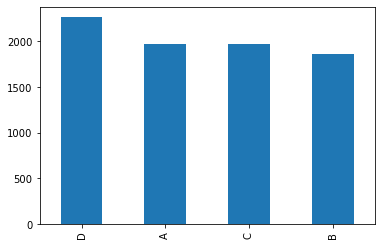

In [306]:
train_df.Segmentation.value_counts().plot(kind= 'bar');
train_df.Segmentation.value_counts()

The target variable, Segment, is not imbalanced.

In [307]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [308]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


Missing values present in the feature variables, for both in train and test data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

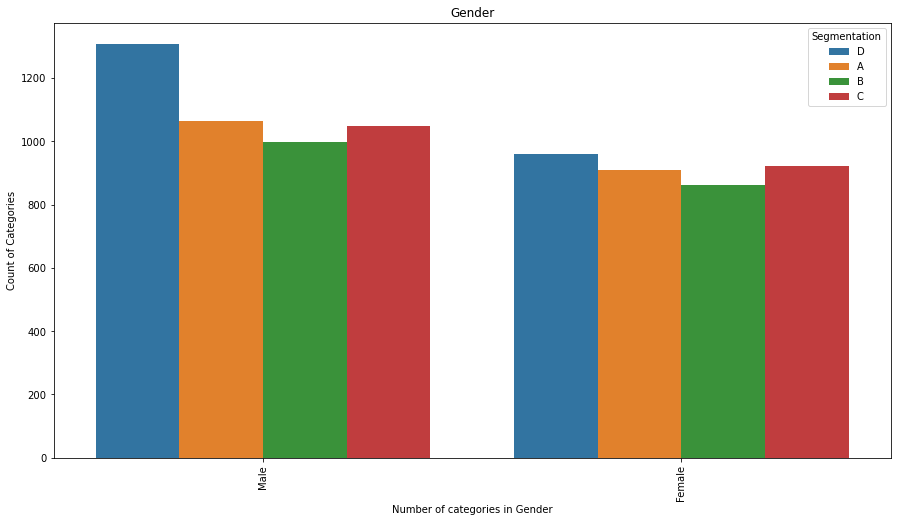

Male      4417
Female    3651
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

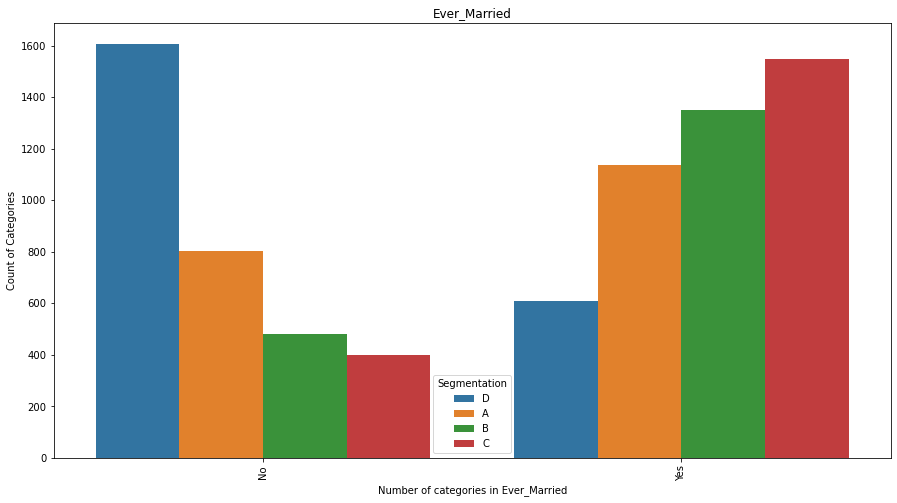

Yes    4643
No     3285
Name: Ever_Married, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

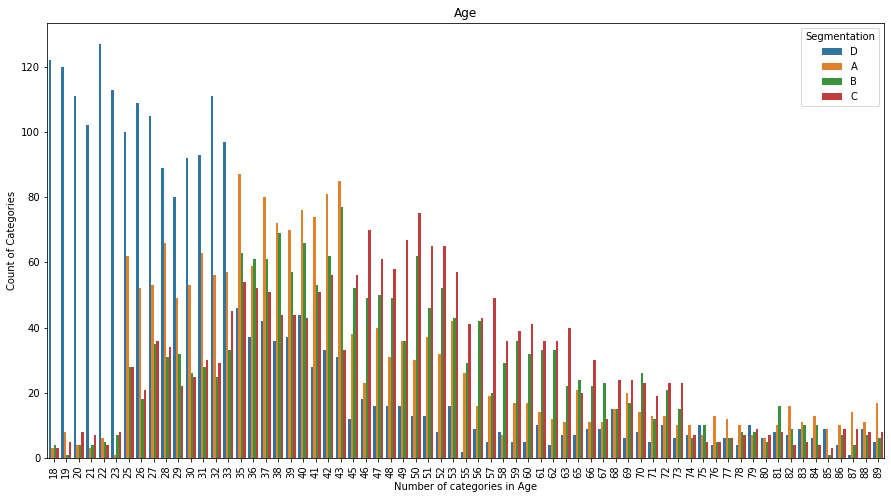

35    250
37    234
33    232
42    232
27    229
     ... 
78     29
87     28
76     27
80     24
85     22
Name: Age, Length: 67, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

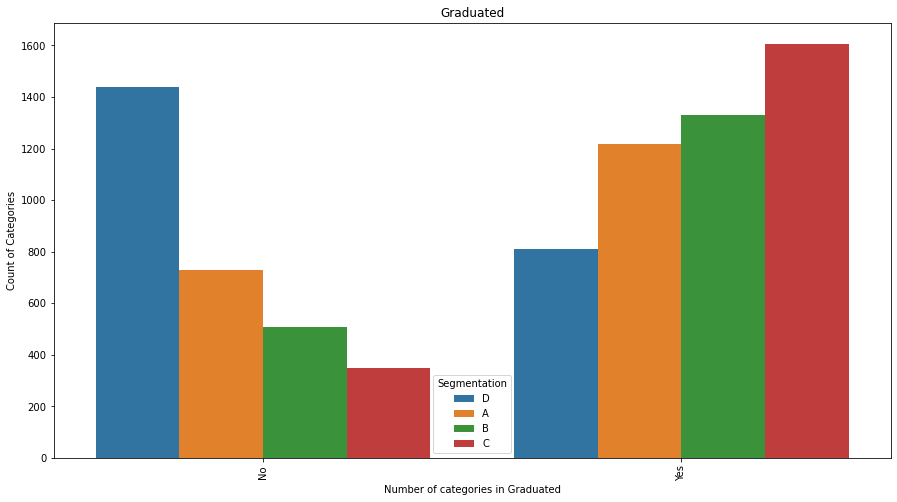

Yes    4968
No     3022
Name: Graduated, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

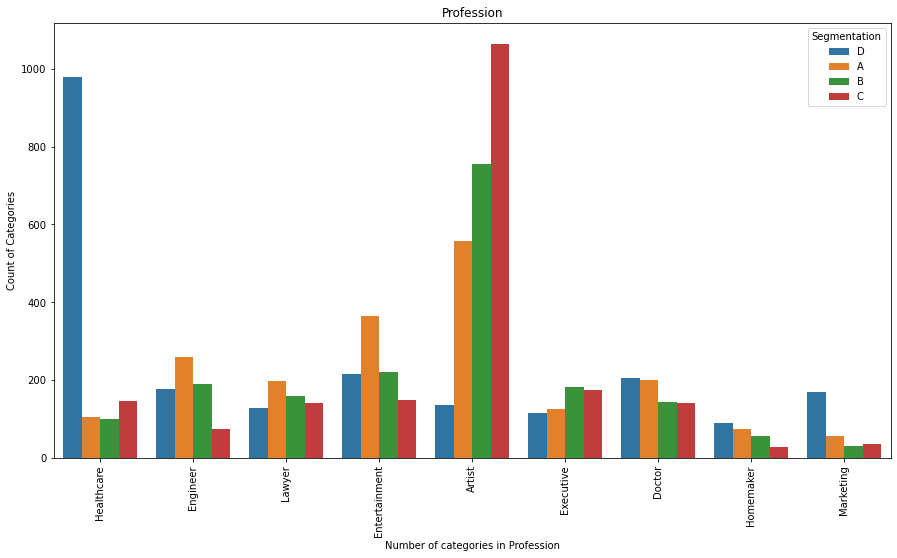

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

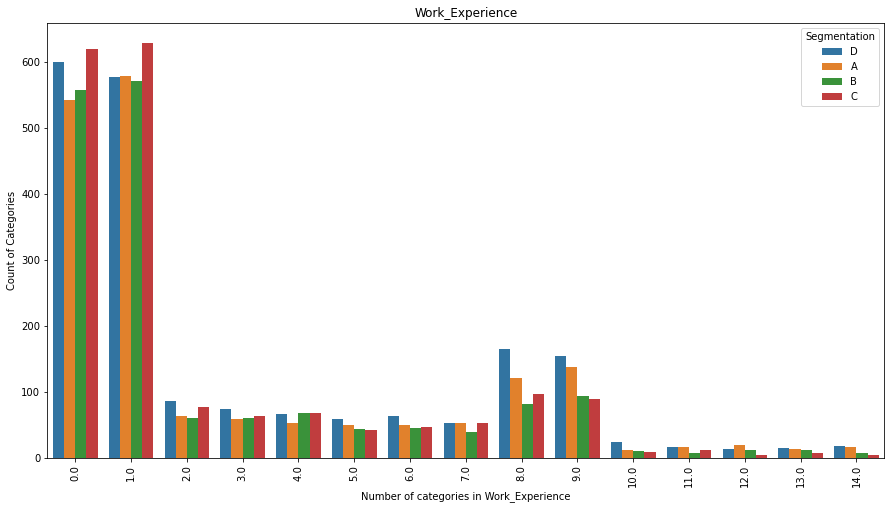

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

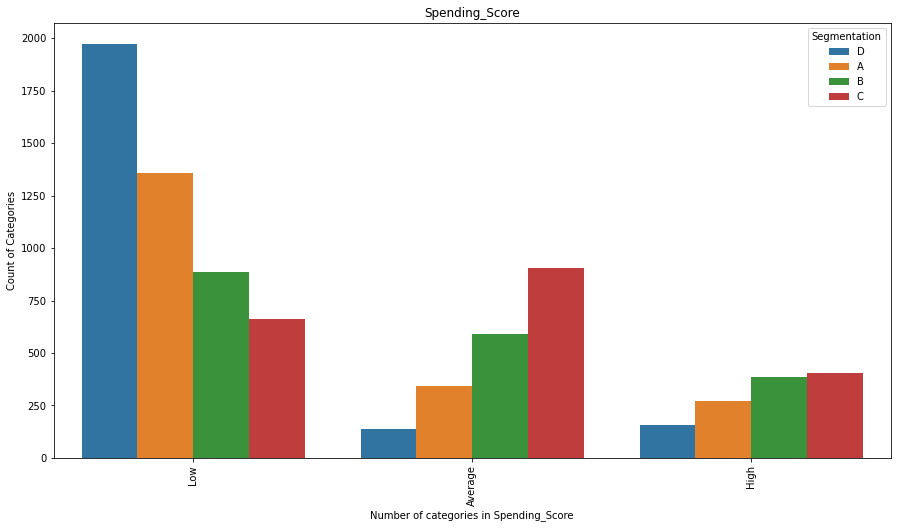

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

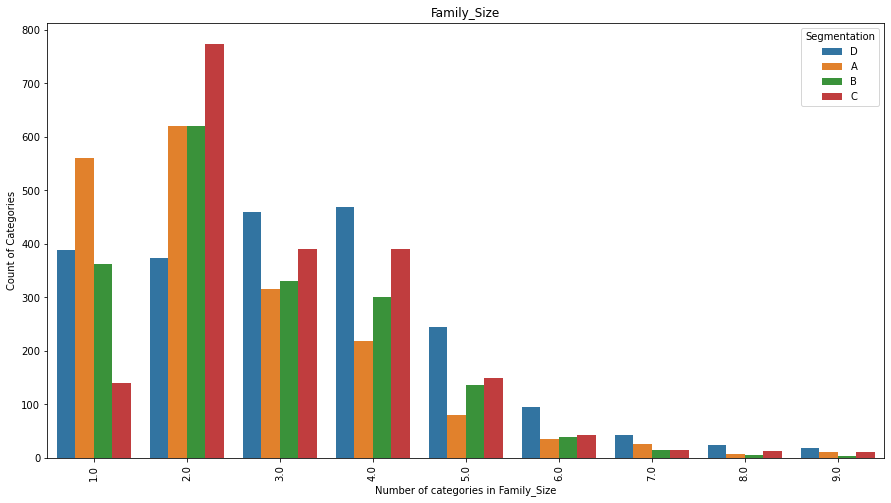

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

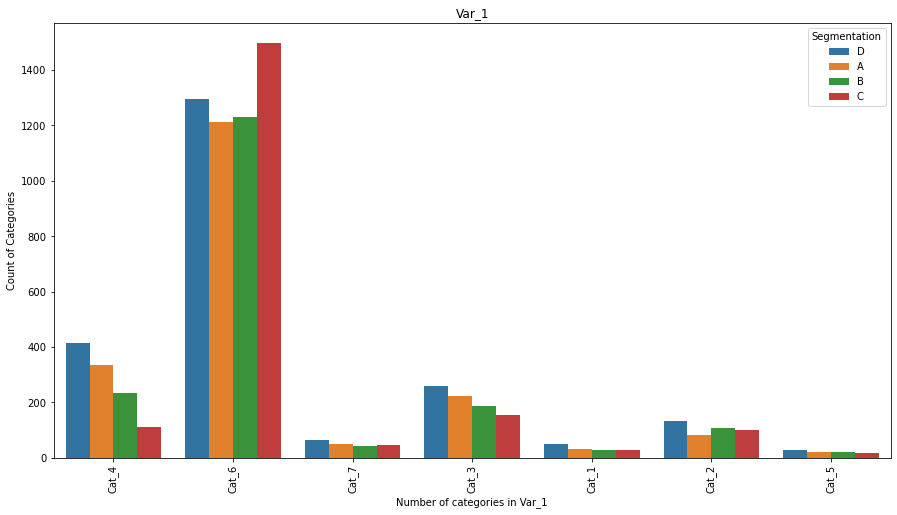

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [309]:
### Distribution of each Variable
for col in train_df.columns[1: 10]:
    #if (train_df[col].dtype == 'float64') or (train_df[col].dtype == 'int64'):
    plt.figure(figsize=(15,8))
    ax = sns.countplot(col,data = train_df,hue = 'Segmentation');
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
    ax.set_xlabel(f'Number of categories in {col}')
    ax.set_ylabel('Count of Categories')
    ax.set_title(col)
    plt.show()

    print(train_df[col].value_counts() )

<b> Observations </b>

* Segment D has more male
* Most unmarried are n group D while married are in Group C
* 

ID                 0.000000
Gender             0.000000
Ever_Married       0.017353
Age                0.000000
Graduated          0.009668
Profession         0.015369
Work_Experience    0.102752
Spending_Score     0.000000
Family_Size        0.041522
Var_1              0.009420
Segmentation       0.000000
dtype: float64


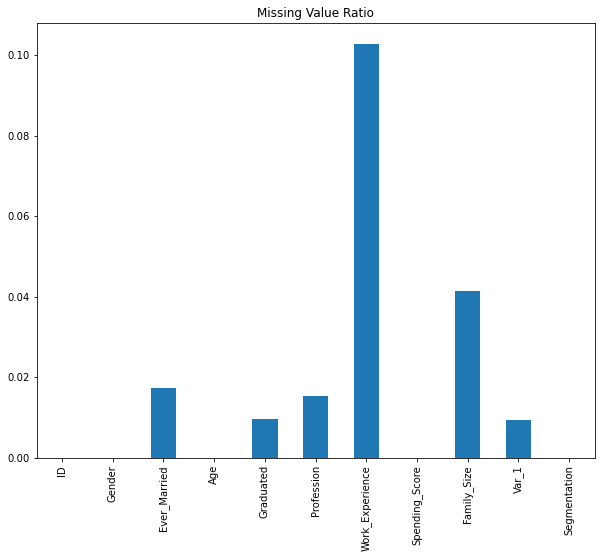

In [310]:
(train_df.isnull().sum()/len(train_df)).plot(kind= 'bar', title= "Missing Value Ratio", figsize= (10, 8));
print(train_df.isnull().sum()/len(train_df))

Missing values the most in Work_Experience.

In [311]:
train_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

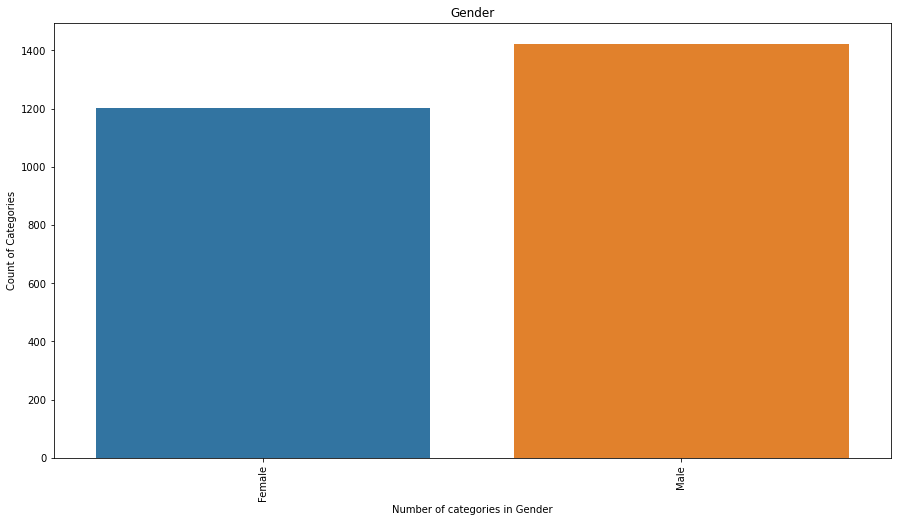

Male      1424
Female    1203
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

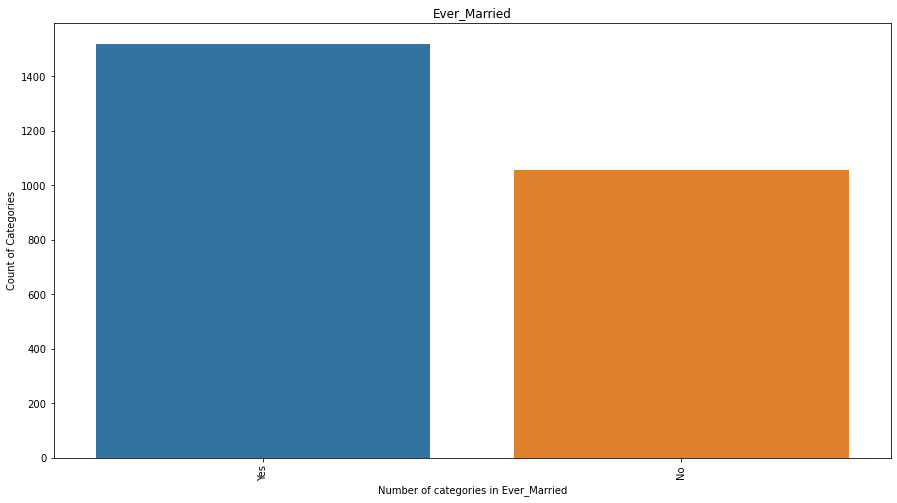

Yes    1520
No     1057
Name: Ever_Married, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

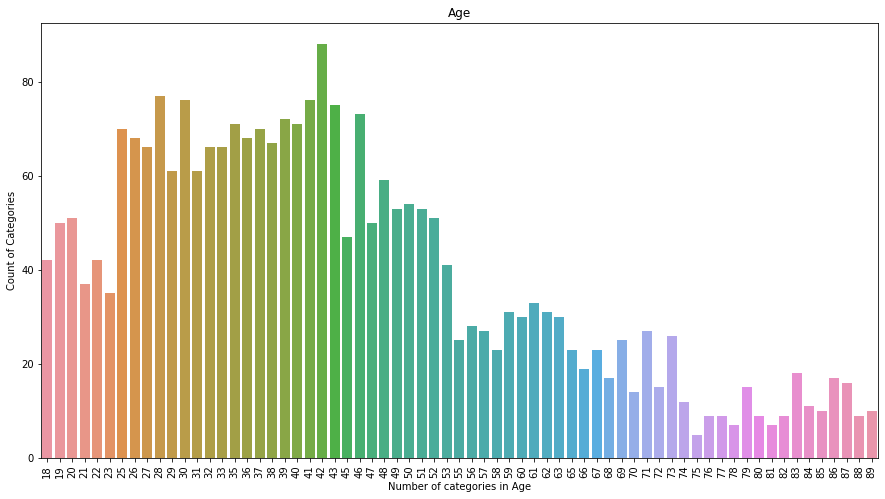

42    88
28    77
41    76
30    76
43    75
      ..
77     9
88     9
78     7
81     7
75     5
Name: Age, Length: 67, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

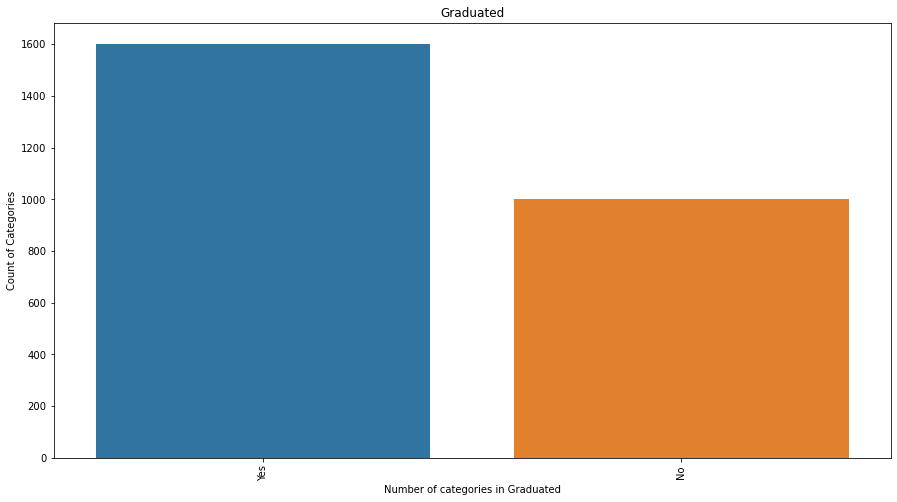

Yes    1602
No     1001
Name: Graduated, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

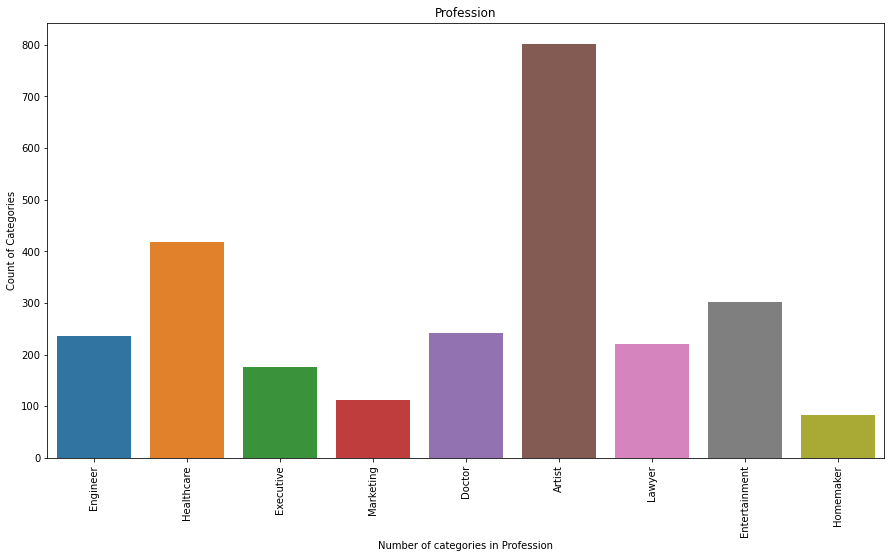

Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

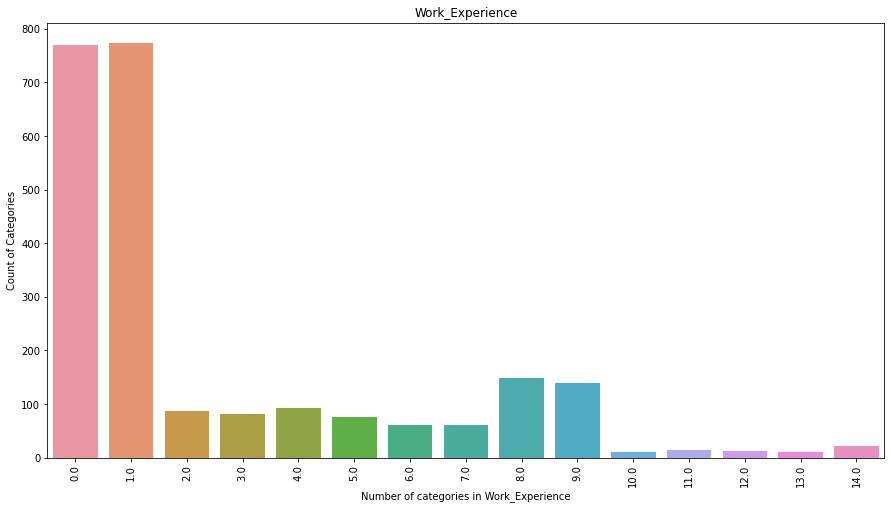

1.0     773
0.0     769
8.0     149
9.0     139
4.0      93
2.0      87
3.0      82
5.0      76
6.0      61
7.0      60
14.0     21
11.0     14
12.0     12
10.0     11
13.0     11
Name: Work_Experience, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

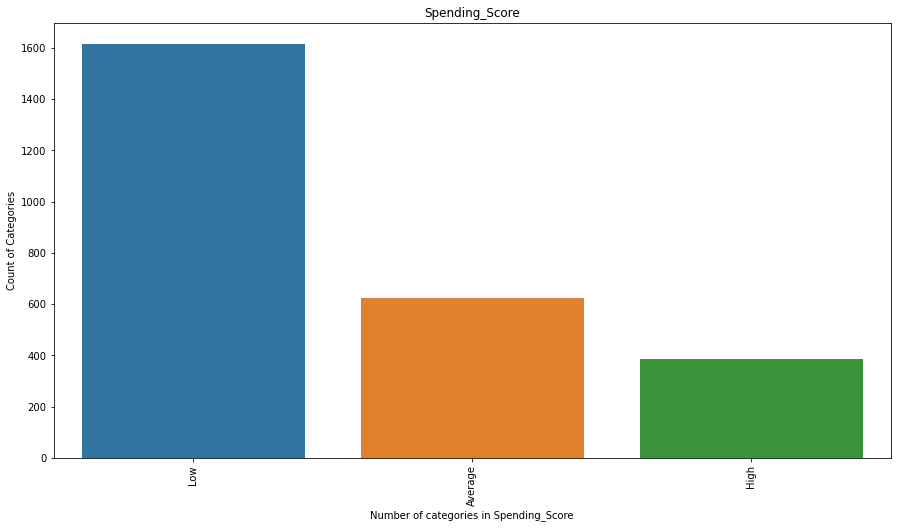

Low        1616
Average     625
High        386
Name: Spending_Score, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

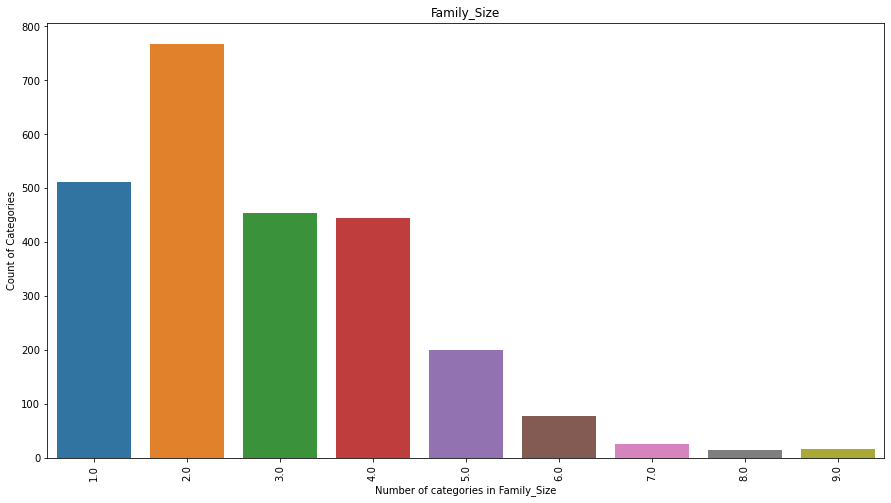

2.0    768
1.0    512
3.0    455
4.0    444
5.0    200
6.0     78
7.0     26
9.0     16
8.0     15
Name: Family_Size, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

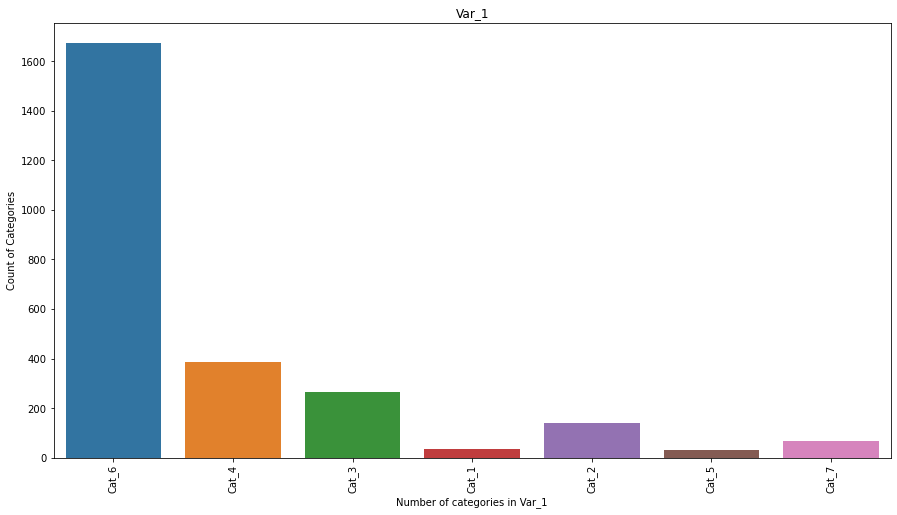

Cat_6    1672
Cat_4     386
Cat_3     267
Cat_2     141
Cat_7      66
Cat_1      34
Cat_5      29
Name: Var_1, dtype: int64


In [258]:
### Distribution of each Variable
for col in test_df.columns[1:]:
    #if (train_df[col].dtype == 'float64') or (train_df[col].dtype == 'int64'):
    plt.figure(figsize=(15,8))
    ax = sns.countplot(col,data = test_df);
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90);
    ax.set_xlabel(f'Number of categories in {col}')
    ax.set_ylabel('Count of Categories')
    ax.set_title(col)
    plt.show()

    print(test_df[col].value_counts() )

ID                 0.000000
Gender             0.000000
Ever_Married       0.019033
Age                0.000000
Graduated          0.009136
Profession         0.014465
Work_Experience    0.102398
Spending_Score     0.000000
Family_Size        0.043015
Var_1              0.012181
dtype: float64


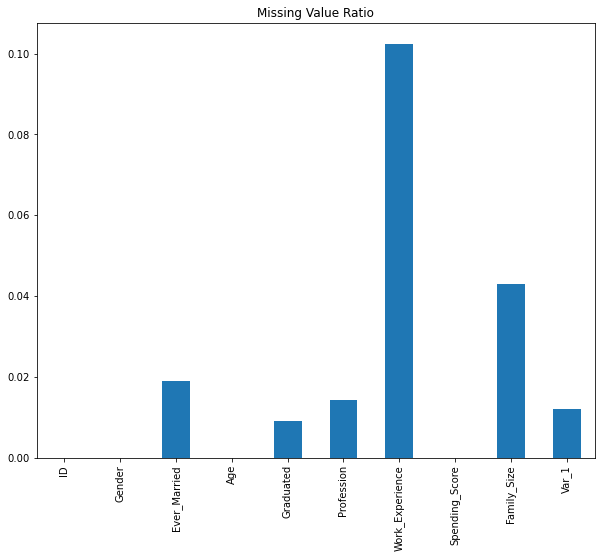

In [312]:
(test_df.isnull().sum()/len(test_df)).plot(kind= 'bar', title= "Missing Value Ratio", figsize= (10, 8));
print(test_df.isnull().sum()/len(test_df))

The missing value pattern is the same in train and test data

In [313]:
test_df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [314]:
train_df["TrainFlg"]= 1
test_df["TrainFlg"]= 0
comb_df= pd.concat( (train_df, test_df), ignore_index= True )
comb_df.head(3)

<IPython.core.display.Javascript object>

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,TrainFlg
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1


In [315]:
print(train_df.shape, test_df.shape, comb_df.shape)

(8068, 12) (2627, 11) (10695, 12)


In [316]:
comb_org= comb_df.copy(deep= True)

In [317]:
print( "Train Data Unique:: ", train_df.ID.nunique() )
print( "Test Data Unique:: ", test_df.ID.nunique() )
print( "Combines Data Unique:: ", comb_df.ID.nunique() )

Train Data Unique::  8068
Test Data Unique::  2627
Combines Data Unique::  8363


Some train ad test data are overlapping as ID is not unique.

In [318]:
ID_count= comb_df.ID.value_counts().sort_values(ascending= False)
ID_rep= ID_count[ID_count.values!= 1]

In [319]:
ID_rep.index.sort_values()

Int64Index([458989, 458994, 458996, 459000, 459001, 459003, 459008, 459013,
            459014, 459015,
            ...
            467933, 467934, 467940, 467946, 467948, 467949, 467950, 467954,
            467958, 467961],
           dtype='int64', length=2332)

In [320]:
comb_df[comb_df.ID.isin(ID_rep.index.sort_values() ) ].head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,TrainFlg
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,1


In [321]:
comb_df.ID.min()

458982

In [322]:
comb_df["CustTime"]= comb_df.ID- comb_df.ID.min()
comb_df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,TrainFlg,CustTime
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,3827
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,1,3661
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1,7333


In [323]:
comb_df.sort_values('CustTime').head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,TrainFlg,CustTime
7238,458982,Male,Yes,61,Yes,Executive,1.0,High,3.0,Cat_6,C,1,0
5546,458983,Female,Yes,63,Yes,Executive,0.0,High,5.0,Cat_6,C,1,1
4373,458984,Male,Yes,39,Yes,Artist,0.0,Average,3.0,Cat_6,C,1,2
4695,458985,Male,No,23,No,Healthcare,1.0,Low,4.0,Cat_6,D,1,3
3333,458986,Male,No,18,No,Healthcare,7.0,Low,4.0,Cat_6,D,1,4


### Missing Values Handling

In [324]:
#comb_df.groupby(["Var_1", "Work_Experience"]).agg(lambda x: x.value_counts().index[0] )
comb_df.Work_Experience.value_counts(dropna= False)
#comb_df.groupby(["Var_1", "Spending_Score"])['Profession'].value_counts()

1.0     3127
0.0     3087
NaN     1098
9.0      613
8.0      612
2.0      373
4.0      346
3.0      337
5.0      270
6.0      265
7.0      256
14.0      66
11.0      64
10.0      64
12.0      60
13.0      57
Name: Work_Experience, dtype: int64

In [325]:
comb_df.isna().sum()/len(comb_df)

ID                 0.000000
Gender             0.000000
Ever_Married       0.017765
Age                0.000000
Graduated          0.009537
Profession         0.015147
Work_Experience    0.102665
Spending_Score     0.000000
Family_Size        0.041889
Var_1              0.010098
Segmentation       0.245629
TrainFlg           0.000000
CustTime           0.000000
dtype: float64

In [326]:
# comb_df.Var_1.fillna('NewCat', inplace= True)
comb_df.Family_Size.fillna(-999, inplace= True) 

comb_df.Ever_Married.fillna(comb_df.Ever_Married.mode()[0], inplace= True)
comb_df.Profession.fillna('Other', inplace= True)                
comb_df.Graduated.fillna("NotYet", inplace= True)
comb_df["Work_Experience"].fillna(-999, inplace= True)
comb_df["Avg_Time"].fillna(-999, inplace= True)
comb_df["Age_WO_Exp"].fillna(-999, inplace= True)

KeyError: 'Avg_Time'

In [278]:
comb_df.isna().sum()/len(comb_df)

ID                 0.000000
Gender             0.000000
Ever_Married       0.000000
Age                0.000000
Graduated          0.000000
Profession         0.000000
Work_Experience    0.000000
Spending_Score     0.000000
Family_Size        0.000000
Var_1              0.010098
Segmentation       0.245629
TrainFlg           0.000000
CustTime           0.000000
Avg_Time           0.000000
Age_WO_Exp         0.000000
dtype: float64

In [279]:
comb_df.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,TrainFlg,CustTime,Avg_Time,Age_WO_Exp
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,3827,173,21.0
1,462643,Female,Yes,38,Yes,Engineer,-999.0,Average,3.0,Cat_4,A,1,3661,96,-999.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,1,7333,109,66.0


### Encoding

In [280]:
def Encoding(col):
    le= sp.LabelEncoder()
    comb_df[col]= pd.Series(le.fit_transform(comb_df[col].astype(str)) ).where(~comb_df[col].isna())

In [281]:
enc_cols= comb_df.columns.drop(["ID", "Age", "Profession", "Family_Size", "Var_1", "Segmentation", "TrainFlg", "CustTime"])
#enc_cols= data_cols.drop(["ID", "Age", "Profession", "Family_Size", "Var_1"])

for cl in enc_cols:
    Encoding(cl)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [282]:
leTrg= sp.LabelEncoder()
comb_df["SegmentationEnc"]= pd.Series(leTrg.fit_transform(comb_df.Segmentation.astype(str)) ).where(~comb_df.Segmentation.isna())
comb_df.SegmentationEnc.value_counts(dropna= False)

<IPython.core.display.Javascript object>

NaN    2627
3.0    2268
0.0    1972
2.0    1970
1.0    1858
Name: SegmentationEnc, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

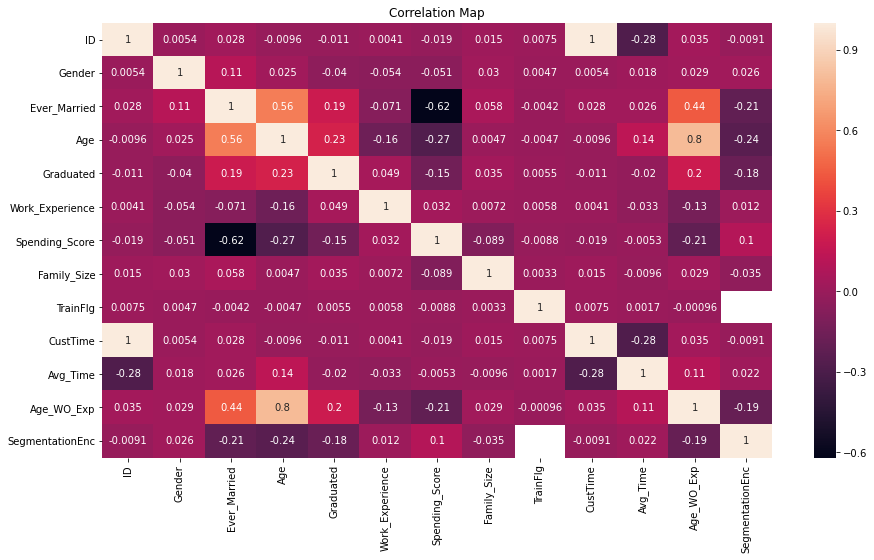

In [283]:
plt.figure(figsize=(15,8))
plt.title("Correlation Map")
sns.heatmap(comb_df.corr(), annot= True);

In OHE, for rows corresponding to missing values, 0 is put for all categories of that variable.

In [284]:
comb_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'TrainFlg', 'CustTime', 'Avg_Time', 'Age_WO_Exp',
       'SegmentationEnc'],
      dtype='object')

In [285]:
ohe_cols= ["Profession", "Var_1"]
comb_df= pd.get_dummies(data= comb_df, columns= ohe_cols)
#comb_df= comb_df.join(ohe_df)
comb_df.head()

<IPython.core.display.Javascript object>

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,TrainFlg,...,Profession_Lawyer,Profession_Marketing,Profession_Other,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,1,0,22,0,2,2,4.0,D,1,...,0,0,0,0,0,0,1,0,0,0
1,462643,0,1,38,2,0,0,3.0,A,1,...,0,0,0,0,0,0,1,0,0,0
2,466315,0,1,67,2,2,2,1.0,B,1,...,0,0,0,0,0,0,0,0,1,0
3,461735,1,1,67,2,1,1,2.0,B,1,...,1,0,0,0,0,0,0,0,1,0
4,462669,0,1,40,2,0,1,6.0,A,1,...,0,0,0,0,0,0,0,0,1,0


## Model Fitting

In [286]:
train_f= comb_df[comb_df.TrainFlg== 1].reset_index()
test_f= comb_df[comb_df.TrainFlg== 0].reset_index()

In [287]:
train_f.columns

Index(['index', 'ID', 'Gender', 'Ever_Married', 'Age', 'Graduated',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation',
       'TrainFlg', 'CustTime', 'Avg_Time', 'Age_WO_Exp', 'SegmentationEnc',
       'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer',
       'Profession_Entertainment', 'Profession_Executive',
       'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer',
       'Profession_Marketing', 'Profession_Other', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

In [288]:
#col_drop= ["index", "ID", "Profession", "Var_1", "Segmentation", "SegmentationEnc", "TrainFlg" ]
col_drop= ["index", "ID", "Segmentation", "SegmentationEnc", "TrainFlg" ]
X = train_f.drop(col_drop, axis = 1)
Y = train_f['SegmentationEnc']

In [289]:
X.head(3)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,CustTime,Avg_Time,Age_WO_Exp,...,Profession_Lawyer,Profession_Marketing,Profession_Other,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,2,2,4.0,3827,83,12,...,0,0,0,0,0,0,1,0,0,0
1,0,1,38,2,0,0,3.0,3661,440,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,2,2,2,1.0,7333,12,60,...,0,0,0,0,0,0,0,0,1,0


In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, shuffle= True, stratify = Y)

In [291]:
# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (5647, 27)
Number transactions y_train dataset:  (5647,)
Number transactions X_test dataset:  (2421, 27)
Number transactions y_test dataset:  (2421,)


In [292]:
def Training_Report(Model,x_train=X_train,x_test=X_test,Y_train=y_train,Y_test=y_test,label = 'C'):
    
    Model.fit(x_train, Y_train.ravel()) 
    predictions = Model.predict(x_test)
    
    print('\n',label)
    print(x_train.shape)
    print(x_test.shape)

    # print classification report 
    print('\n Classification Report:\n',classification_report(Y_test, predictions)) 
    
    #Confusion Matrix
    conf_mat = confusion_matrix(y_true=Y_test, y_pred=predictions)

    print('\n Confusion matrix:\n', conf_mat)
    
    print('\n Accuracy Score:\n', accuracy_score(Y_test,predictions))

In [293]:

#Decition Tree
DT = DecisionTreeClassifier(random_state = 0) 

#Random Forest
RF = RandomForestClassifier(random_state = 0,n_jobs = -1,n_estimators=500)

# Gradient Boost
GB = GradientBoostingClassifier(learning_rate=0.001,random_state=0,n_estimators=1000)

In [294]:
# Model Fit on train and getting the results

Training_Report(RF,label = 'RF')


 RF
(5647, 27)
(2421, 27)

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.48      0.46       592
         1.0       0.44      0.34      0.39       557
         2.0       0.56      0.54      0.55       591
         3.0       0.64      0.72      0.67       681

    accuracy                           0.53      2421
   macro avg       0.52      0.52      0.52      2421
weighted avg       0.52      0.53      0.52      2421


 Confusion matrix:
 [[285  98  70 139]
 [154 191 153  59]
 [ 73 119 320  79]
 [138  27  29 487]]

 Accuracy Score:
 0.529946303180504


In [295]:
RF.fit(X, Y)
# clf.fit(X, Y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=0)

## Prediction

In [296]:
pred = RF.predict(test_f[X.columns])

In [297]:
test_f["Segmentation"]= leTrg.inverse_transform(pred.astype(int))

df_subm = test_f[['ID', 'Segmentation']]
df_subm.head()

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,C


In [298]:
train_f.Segmentation.value_counts()/len(train_f)

D    0.281111
A    0.244422
C    0.244175
B    0.230293
Name: Segmentation, dtype: float64

In [299]:
df_subm.Segmentation.value_counts()

D    778
A    653
C    626
B    570
Name: Segmentation, dtype: int64

In [300]:
df_subm.to_csv(f"{filepath}\SubmissionRF_5.csv", index= False)